Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as any collaborators you worked with:

In [1]:
COLLABORATORS = ""

---

In [2]:
%matplotlib inline
%precision 16
import numpy
import matplotlib.pyplot as plt
import pandas as pd

# Final Project

This notebook will provide a brief structure and rubric for presenting your final project. 

The purpose of the project is 2-fold
* To give you an opportunity to work on a problem you are truly interested in (as this is the best way to actually learn something)
* To demonstrate to me that you understand the overall workflow of problem solving from problem selection to implementation to discussion 

You can choose any subject area that interests you as long as there is a computational component to it.  However, please do not reuse projects or homeworks you have done in other classes.  This should be **your** original work.

**You can work in teams, but clearly identify each persons contribution** and every team member should hand in their own copy of the notebook.

### Structure
There are 5 parts for a total of 100 points that provide the overall structure of a mini research project.

* Problem Description
* Problem Justification
* Description of Computational components needed to address problem
* Implementation including tests
* Discussion of results and future directions

For grading purposes, please try to make this notebook entirely self contained. 

The project is worth about 2 problem sets and should be of comparable length (please: I will have about 100 of these to read and I am not expecting full 10 page papers).  The actual project does not necessarily have to work but in that case you should demonstrate that you understand why it did not work and what steps you would take next to fix it.

Have fun

### We have to Install few pakages for this project
#### I would like to request to run the next few cells for installing pakages

In [3]:
!pip install opencv-python

#### Now we will Import OpenCV - OpenCV is a library of programming functions mainly aimed at real-time computer vision

In [4]:
import cv2
import numpy as np

## Problem Description [15 pts]

In ~4-5 paragraphs, describe the general problem you want to solve and the goals you hope to achieve. You should provide any relevant background, equations you plan to solve and references, particularly if you are reproducing results from a paper.  Please use proper spelling and grammar. 

## Problem Description

Autonomous Vehicles are vehicles that navigate to a destination without the assistance of a human. They interpret and respond to traffic, pedestrians, and other critical situations using sensors and computer algorithms. There are many benefits associated with the self-driving car:- 
<br>
1. Mobility for the elderly and disabled, who may not be physically or legally able to operate a human-driven vehicle.
<br>
2. Reduction in traffic congestion by communicating and coordinating with other cars that might need to take the same route.
<br>
3. Free time for the drivers while commuting long distances. 
<br>
4. Increase in safety for the human user in the warehouse environment.

For developing an Autonomous Vehicle, it is important to understand how they perceive the environment. The autonomous vehicle does not have eyes like us, however, we can provide them vision using different kinds of sensors. The most common sensor is the camera sensor. The camera sensors along with Computer Vision algorithms help the autonomous vehicle to perceive the environment. The data we collect from the environment is used in making decisions that are useful while autonomous driving. 
<br>
<br>
In this project, I would like to reproduce and modify algorithms that are available in the research papers -  "Lane Detection for Autonomous Vehicles using OpenCV Library" and "Real-time Lane detection and Motion Planning in Raspberry Pi and Arduino for an Autonomous Vehicle Prototype". I will be writing an algorithm that can detect lanes from a captured image, video, and real-time. I will be using various methodologies like the Canny Edge Detection Technique, Gaussian blur, Region of Interest, and Hough Transform. 

<br>
<br>
Autonomous Vehicle Industries are expanding rapidly, hence the need for computer vision engineers for developing more reliable and safe autonomous vehicles for the users. While developing any Autonomous system enhancing the accuracy of motion for autonomous vehicles is an important need in the industry. The more accurately the autonomous vehicle will perceive the environment, the more reliable can autonomous vehicle can be. Hence, doing this project will provide me insights into algorithms and techniques that I can use in future research work for developing safe and reliable autonomous vehicles.

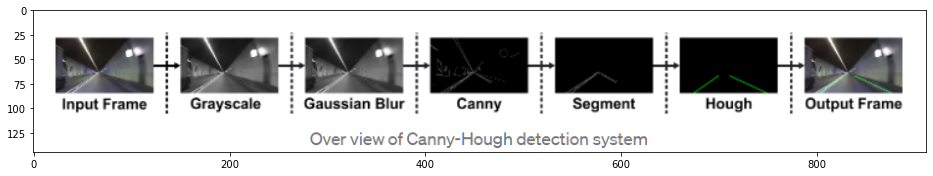

In [5]:
image = cv2.imread('intro.png')
fig = plt.figure(figsize=(16,6))
plt.imshow(image)
plt.show()

We will like to change the 3 (RGB) channel image to single-channel as processing a single channel is faster and less computationally intensive. After converting the image into Grayscale, we used Gaussian Blur to Reduce Noise and Smoothen the Image. Once the noise has been reduced, we can apply the Canny Method to detect the lines in the images. One of the most important steps is to identify the region of interest. Once the region of interest is specified we use Hough Transform Technique to detect straight lines, for giving smooth lines we can take an average of slope and intercept. Finally, we use masking to show the lines on the real data ( Image, Video, or real-time video feed ).

I will explain every step in detail along with simple examples in the later cells with the code. 

## Problem Justification [5 pts] 

Briefly describe why this problem is important to you,  and, if possible, to anyone else.

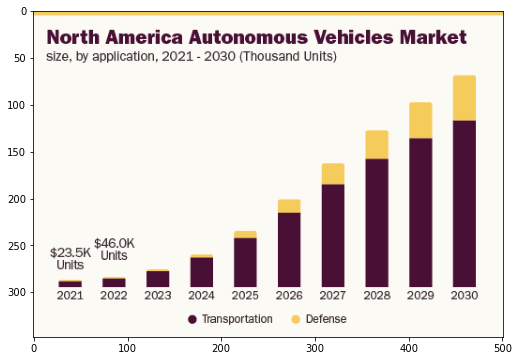

In [6]:
image = cv2.imread('stat.png')
fig = plt.figure(figsize=(16,6))
plt.imshow(image)
plt.show()

Autonomous Vehicle Industries are expanding rapidly, hence the need for computer vision engineers for developing more reliable and safe autonomous vehicles for the users. Enhancing the accuracy of motion for autonomous vehicles is an important need in the industry. The more accurately the autonomous vehicle will perceive the environment, the more reliable can autonomous vehicle can be. Hence, doing this project will provide me insights into algorithms and techniques that I can use in future research work for developing safe and reliable autonomous vehicles.

In addition to this, the use of the autonomous vehicle is increasing every year. Hence, we can deduce that the environment where these vehicles are interacting with humans is also increasing. Therefore, there is a need to achieve high accuracy to provide reliability about the safety to the user. Working on this project has provided me with an opportunity to learn about computer vision and algorithms that can help in my future research to enhance the accuracy of detecting lanes, objects and other obstacle in the environment.

## Computational  Methods [10 pts]

Describe the specific approach you will take to solve some concrete aspect of the general problem. 

You should  include all the numerical or computational methods you intend to use.  These can include methods or packages  we did not discuss in class but provide some reference to the method. You do not need to explain in detail how the methods work, but you should describe their basic functionality and justify your choices. 

**If you need to install or import any additional python packages,  please provide complete installation instructions in the code block below**



#### We need to install OpenCV (Open Computer Vision Library) for our project. 

In [7]:
!pip install opencv-python

#### We will use the OpenCV library for the Computer Vision task. As we know that any image can be represented using an array we will import a NumPy array for representing the image into the NumPy array. We will use matplotlib for plotting graphs.

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Provide complete installation or import information for external packages or modules here e.g. 
#pip install somepackage
# from somepackage import blah

#### Hough transform
The purpose of the Hough Transform technique is to find imperfect instances of objects within a certain class of shapes by a voting procedure.
<br>
We know that we can represent a line by the equation y = mx + c.
<br>
We can also represent line using hough space(ploting m on x axis and c on y axis).
<br>
Hence an entire line can be ploted by a single point in Hough space.
<br>
We can try to map single point(family of line going through this single point) in x and y space to Hough space which will give us straight line in hough space.
<br>
So when taking two points we can find out point of intersection in hough space that will give values of m and c
<br>
As we cannot find out the coordinates of the vertical line we can use polar coordinate to solve this problem
<br>
Now in hush plot we will get sinosoidal curve for each family of line passing through a point.
<br>
Now we will apply the above idea to find out the lines in our gradient image.
<br>

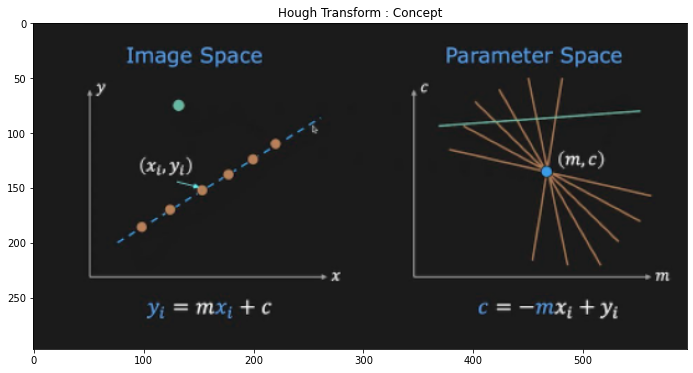

In [27]:
image = cv2.imread('hough.png')
fig = plt.figure(figsize=(16,6))
plt.imshow(image)
plt.title("Hough Transform : Concept")

plt.show()

## Implementation [60 pts]

Use the Markdown and Code blocks below to implement and document your methods including figures.  Only the first markdown block will be a grading cell but please add (not copy) cells in this section to organize your work. 

Please make the description of your problem readable by interlacing clear explanatory text with code (again with proper grammar and spelling). 
All code should be well described and commented.

For at least one routine you code below, you should provide a test block (e.g. that implements `numpy.testing` routines) to validate your code.  

An **important** component of any computational paper is to demonstrate to yourself and others that your code is producing correct results.

#### Before Starting the implementation, I would like to give brief technical Introduction to Computer Vision Basics. 
#### For Gray Scale Image 
<br>
Images can be represented as a function of two variables, X and Y, which define a two-dimensional area.
<br>
The Pixel is the raw building block of an image.
<br>
The image below has a size of 32 x 16.
<br>
The total number of pixels in the image is 512.
<br>
The pixel values vary from 0(Black) to 255(White).

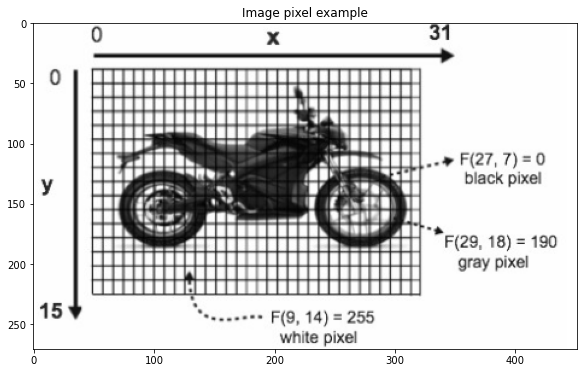

In [9]:
image = cv2.imread('raw image.png')
fig = plt.figure(figsize=(16,6))
plt.imshow(image)
plt.title("Image pixel example")

plt.show()

#### In case of color Image 
<br>
Instead of representing the value of the pixel by one number, the value’s represented by three numbers representing the intensity of each color in this pixel. 
<br>
In RGB system for example, the value of the pixel is represented by three numbers: the intensity of red, intensity of green, and intensity of blue.
<br>
It is computationally heavy to work with RGB images, hence we will be converting RGB images into gray scale.

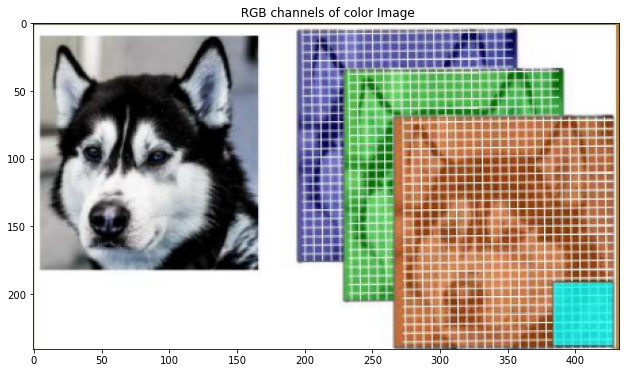

In [10]:
image = cv2.imread('RGB_channel.png')
fig = plt.figure(figsize=(16,6))
plt.imshow(image)
plt.title(" RGB channels of color Image")

plt.show()

## Importing libraries 

In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#### Canny edge detection is a technique to extract useful structural information from different vision objects and dramatically reduce the amount of data to be processed. 
<br>
I will be using the edge detection algorithm, the Canny edge detector technique for this project.
<br>
We know that the image can be represented as an array of pixels of different Intensities.
<br>
In addition to this, we can also represent the image in 2 Dimensional Space, x and y where x*y would be equal to the total number of pixels.
<br>
By this representation, we can look at the images as a continuous function of x and y.
<br>
Hence it's a mathematical function so we can perform a mathematical operation.
<br>

#### Now the question arises what operator can we use to detect rapid changes in our image 
<br>
The Canny function performs a derivative on the function in both x and y directions, thereby measuring the change in intensity with adjacent pixels.
<br>
A small derivative is a small change in Intensity and a big derivative is a big change in Intensity.
<br>
By computing the change in Intensity we are computing the gradient.

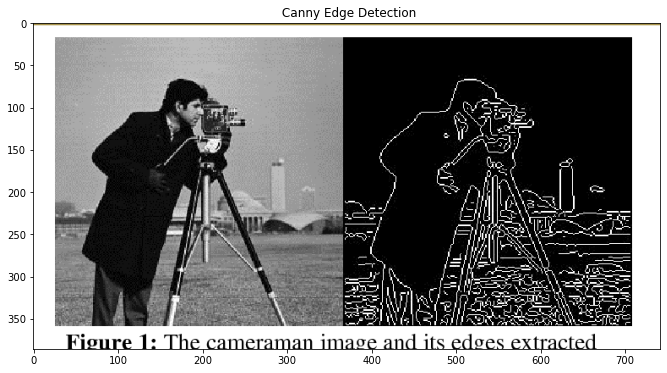

In [12]:
image = cv2.imread('1.png')
fig = plt.figure(figsize=(16,6))
plt.imshow(image)
plt.title(" Canny Edge Detection")
plt.show()

#### Gaussian Blur 
Gaussian Blur  - Used to Reduce Noise and Smoothen the Image.
<br>
Image is represented as the pixels we can smoothen out the image by modifying the value of a pixel by the average value of the pixel intensity around it.
<br>
We will be using kernel with normally distributed numbers.
<br>
The formula of a Gaussian function in one dimension is

$${\displaystyle G(x)={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}e^{-{\frac {x^{2}}{2\sigma ^{2}}}}}$$

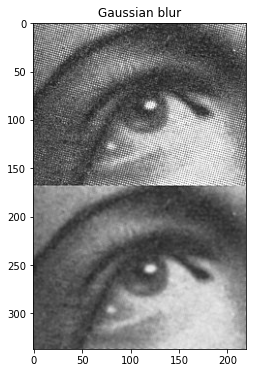

In [13]:
image = cv2.imread('gaussian blur.jpg')
fig = plt.figure(figsize=(16,6))
plt.imshow(image)
plt.title("Gaussian blur")
plt.show()

### canny_image
Step 1: Coverting 3 chanel RGB image into 1 chanel gray scale image to reduce computational usage 
<br>
Step 2: Use of Gaussian blur to reduce noise from the Image 
<br>
Step 3: Using Canny edge detection technique
<br>

In [14]:
def canny_image(image):
    """"
    This function detect edges in the image
    
    Parameters
    ----------
    Input: Image - numpy array   
    
    Return :Images - numpy array  

    """
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray,(5,5),0) # second argument is size of the kernal, third argument is deviation
    canny = cv2.Canny(blur,50,150) # lower threshold , Upper threshold
    return canny

#### make_coordinates

This function extracts coordinates [X1,Y1, X2,Y2] of the lines 
<br>
Step 1: Extracting out the slope and intercept value from line_parameters
<br>
Step 2: Extracting out Y1 value from the image 
<br>
Step 3: Calculating the Y2 value 
<br>
Step 4: Calculating X1 and X2 using Y1 and Y2

In [15]:
def make_coordinates(image, line_parameters):
    """
    This function extracts coordinates [X1,Y1, X2,Y2] of the lines
    
    Parameters
    ----------
    Input: Image - numpy array   
           line_parameters - slope value in float, numpy array for intercept coordinate axis
    
    Return :Images - numpy array  

    """
    slope, intercept = line_parameters
    y1 = image.shape[0]
    y2 = int(y1*(3/5))
    x1 = int((y1-intercept)/slope)
    x2 = int((y2-intercept)/slope)
    return np.array([x1,y1,x2,y2])  

#### display_lines
Input: Image, coordinates where X and Y values are found
<br>
Return: Image on which lines will be displayed i.e [x1,y1,x2,y2]
<br>
This function display lines on the original Image 
<br>
Step 1: Creating a zero array of the same shape as the image
<br>
Step 2: Check if lines are not None i.e. we have detected some lines from the images 
<br>
Step 3: Extracting out coordinates of the lines and superpose them into the original image 


In [16]:
def display_lines(image,lines):
    """
    This function display lines on the orignal Image 
    
    Parameters
    ----------
    Input: Image - numpy array   
           lines - slope value in float, numpy array for intercept coordinate axis
    
    Return :line_image - numpy array  

    """
  
    line_image = np.zeros_like(image)
    if lines is not None:
        for line in lines:
            x1,y1,x2,y2 = line.reshape(4)
            cv2.line(line_image, (x1,y1),(x2,y2), (255,0,0), 6)
    
    return line_image

#### average_slope_intercept

Input: Image and lines coordinates 
Return: Coordinates lines that are averaged for a smoother view.
This function averages the coordinates for a smooth look when overlapped with an original image.
Step 1: Using the polyfit function to find out the slope and Intercept 
Step 2: if the slope is negative then append them into a list for the left side of the line  else right sideline list
Step 3: finding out the average of the left and right lines to give smooth values of slope and intercepts 

In [17]:

def average_slope_intercept(image, lines):
    """
    This function averages the coordinates for a smooth look when overlapped with an original image.

    Parameters
    ----------
    Input: Image - numpy array   
           lines - slope value in float, numpy array for intercept coordinate axis
    
    Return :line_image - averaged slope value in float, numpy array of left and right line averaged coordinates for smooth look

    """   
    left_fit = []
    right_fit = []  
    for line in lines:
        x1,y1,x2,y2 = line.reshape(4)
        parameters = np.polyfit((x1,x2),(y1,y2),1)
        slope = parameters[0]
        intercept = parameters[1] # lines on the left is having positive slope and right is positive slope
        if slope < 0:
            left_fit.append((slope, intercept))
        else:
            right_fit.append((slope,intercept))
    left_fit_average = np.average(left_fit, axis = 0)
    right_fit_average = np.average(right_fit, axis = 0)
    left_line = make_coordinates(image, left_fit_average)
    right_line = make_coordinates(image, right_fit_average)
    return np.array([left_line,right_line])        

#### One problem that I encountered was that when I was using the above-mentioned techniques, the output that I was getting was

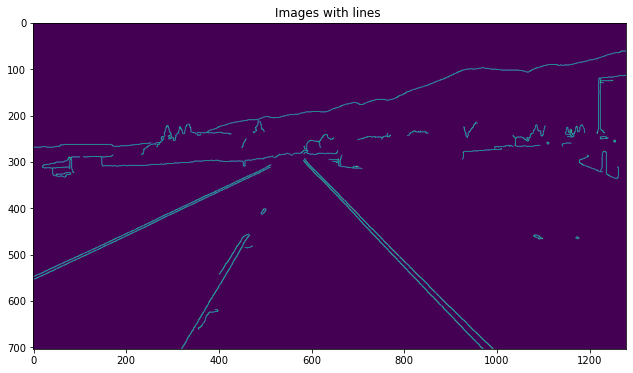

In [18]:
image = cv2.imread('test_image.jpg')
image = canny_image(image)
fig = plt.figure(figsize=(16,6))
plt.imshow(image)
plt.title("Images with lines ")
plt.show()

#### As you can see from the above image that the algorithm is detecting lines in the whole image, however the area of interest is only the road. Hence, we would like to mark our region of interest using the function region_of_interest. For using this function, we have to find out coordinates of area that we wanted to mark. An example is given below

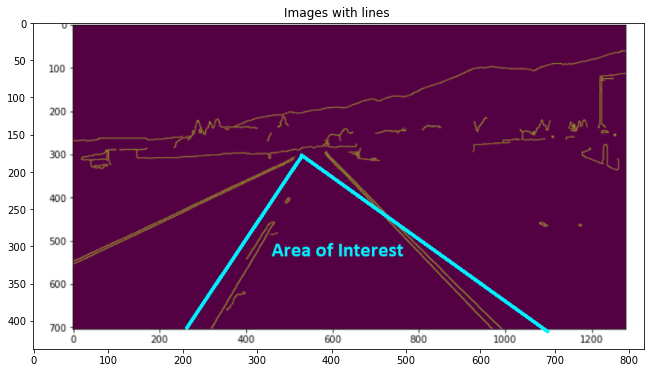

In [19]:
image = cv2.imread('image_with label.png')
fig = plt.figure(figsize=(16,6))
plt.imshow(image)
plt.title("Images with lines ")
plt.show()

#### Once we find the coordinate, we will include it into the region_of_interest at defining polygons array.

<br>

#### Using bitwise and(&) operator is an important step to only get the area of interest as the rest of the array will become zero and the area of interest would be one. 

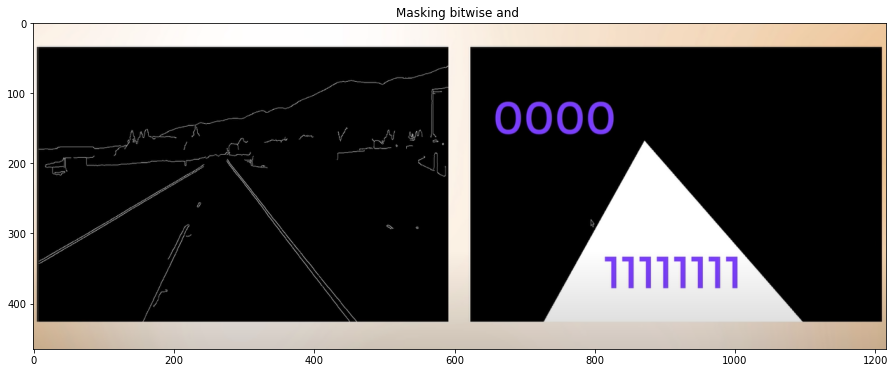

In [20]:
image = cv2.imread('masking.png')
fig = plt.figure(figsize=(16,6))
plt.imshow(image)
plt.title("Masking bitwise and ")
plt.show()

#### region_of_interest

Input: Image array
Return: Masked image (array) with area of interest 
This function creates an area of interest for the camera , where all the algorithms would be focused 
Step 1: Defining polygon array (Triangular in this case)
Step 2: Masking the Image
Step 3: Using bitwise and to get  only area of interest area

In [21]:


def region_of_interest(image):
    
    """
    This function creates an area of interest for the camera , where all the algorithms would be focused 


    Parameters
    ----------
    Input: Image - numpy array   
           
    
    Return : Masked Image - numpy array of zeros and ones , slope values

    """ 
    height = image.shape[0]
    polygons = np.array([[(200,height),(1100,height),(550,250)]])
    mask = np.zeros_like(image)
    cv2.fillPoly(mask, polygons, 255)
    masked_image = cv2.bitwise_and(image,mask)
    return masked_image

#### We can plot the Image to get the coordinates for area of Interest

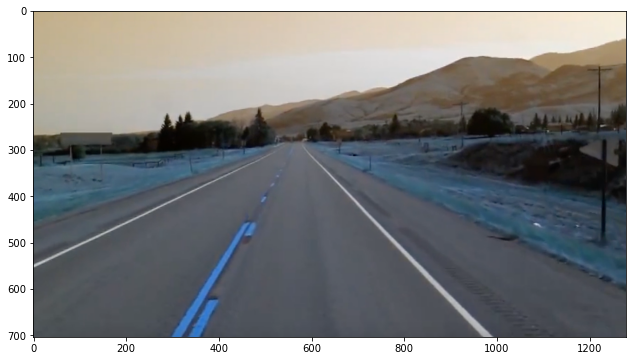

In [22]:
#To find out the area of interest 
image = cv2.imread('test_image.jpg')
fig = plt.figure(figsize=(16,6))
plt.imshow(image)
plt.show()

#### Tracking line in the Image 

In [ ]:
""""
STEP 1: Reading the Image
STEP 2: Copying the Image
STEP 3: Applying the canny method to find lines
STEP 4 : Taking out the area of Interest part from the image
STEP 5: 
lines = cv2.HoughLinesP(cropped_images, 2, np.pi/180, 100, np.array([]), minLineLength = 40, maxLineGap = 5 ) 

with the following arguments:
cropped_images: Output of the edge detector. It should be a grayscale image (although it is a binary one)
rho: The resolution of the parameter r in pixels. We use 2 pixels.
theta: The resolution of the parameter θ in radians. We use 1 degree (np. pi/180)
place holder 
minLineLength: length of line that in pixels that we except
Malinga : maximum distance in pixel between segmented lines

STEP 6: Display lines on the original image
STEP 7: Setting up the weights to lines pixel and image pixels 
STEP 8: Showing the Image
"""


image = cv2.imread('test_image.jpg') 
lane_image = np.copy(image)
can = canny_image(lane_image)
cropped_images = region_of_interest(can)
lines = cv2.HoughLinesP(cropped_images, 2, np.pi/180, 100, np.array([]), minLineLength = 40, maxLineGap = 5 ) 
averaged_lines = average_slope_intercept(lane_image, lines )

line_image = display_lines(lane_image, lines)
combo_image = cv2.addWeighted(lane_image, 0.8, line_image, 1, 1 ) # line_image will have 20% more weights last one is gamma that will be added

while True:
    cv2.imshow('Lane Image ', combo_image)  # this function shows the image which needs two arguments name of window and image that you want to show
    key = cv2.waitKey(1)  # waitKey function helps in keeping the image on screen untill we press escape 
    if key == 27:
        break
        
cv2.destroyAllWindows()

#### Result will look like this 

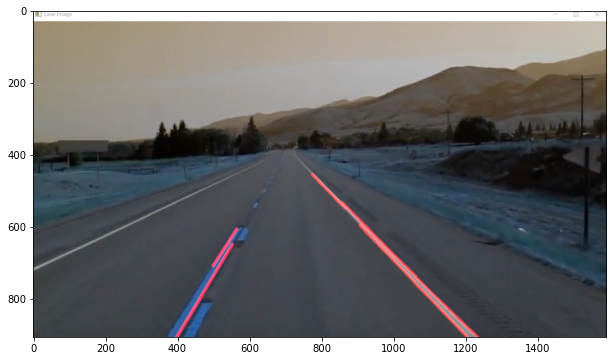

In [23]:
image = cv2.imread('lane_detected.png')
fig = plt.figure(figsize=(16,6))
plt.imshow(image)
plt.show()

#### Tracking lane in the Video

In [ ]:
""""
STEP 1: Reading the Video
STEP 2: Using While loop o run the Video
STEP 3: Applying the canny method to find lines
STEP 4 : Taking out the area of Interest part from the image
STEP 5: 
lines = cv2.HoughLinesP(cropped_images, 2, np.pi/180, 100, np.array([]), minLineLength = 40, maxLineGap = 5 ) 

with the following arguments:
cropped_images: Output of the edge detector. It should be a grayscale image (although it is a binary one)
rho: The resolution of the parameter r in pixels. We use 2 pixels.
theta: The resolution of the parameter θ in radians. We use 1 degree (np. pi/180)
place holder 
minLineLength: length of line that in pixels that we except
Malinga : maximum distance in pixel between segmented lines

STEP 6: Display lines on the original image
STEP 7: Setting up the weights to lines pixel and image pixels 
STEP 8: Showing the Image
"""


cap = cv2.VideoCapture("test2.mp4")
while(cap.isOpened()):
    _, frame = cap.read()
    if frame is  None:
        cap.release()
        break
    
    can = canny_image(frame)
    cropped_images = region_of_interest(can)
    lines = cv2.HoughLinesP(cropped_images, 2, np.pi/180, 100, np.array([]), minLineLength = 40, maxLineGap = 50 ) 
    line_image = display_lines(frame, lines)
    combo_image = cv2.addWeighted(frame, 0.8, line_image, 1, 1 ) # line_image will have 20% more weights last one is gamma that will be added
    cv2.imshow('Lane Image ', combo_image)
    if cv2.waitKey(1) == 27:
        break

cap.release()
cv2.destroyAllWindows()


#### The result will look like https://youtu.be/gKYQQ6L8YdA

In [ ]:
""""
STEP 1: Reading the Video from the camera
STEP 2: Using While loop o run the Video
STEP 3: Applying the canny method to find lines
STEP 4 : Taking out the area of Interest part from the image
STEP 5: 
lines = cv2.HoughLinesP(cropped_images, 2, np.pi/180, 100, np.array([]), minLineLength = 40, maxLineGap = 5 ) 

with the following arguments:
cropped_images: Output of the edge detector. It should be a grayscale image (although it is a binary one)
rho: The resolution of the parameter r in pixels. We use 2 pixels.
theta: The resolution of the parameter θ in radians. We use 1 degree (np. pi/180)
place holder 
minLineLength: length of line that in pixels that we except
Malinga : maximum distance in pixel between segmented lines

STEP 6: Display lines on the original image
STEP 7: Setting up the weights to lines pixel and image pixels 
STEP 8: Showing the Image
"""


cap = cv2.VideoCapture(0)
while(cap.isOpened()):
    _, frame = cap.read()
    if frame is  None:
        cap.release()
        break
    can = canny_image(frame)
    cropped_images = region_of_interest(can)
    lines = cv2.HoughLinesP(cropped_images, 2, np.pi/180, 100, np.array([]), minLineLength = 40, maxLineGap = 50 ) 
    line_image = display_lines(frame, lines)
    combo_image = cv2.addWeighted(frame, 0.8, line_image, 1, 1 ) 
    cv2.imshow('Lane Image ', combo_image)
    if cv2.waitKey(1) == 27:
        break

cap.release()
cv2.destroyAllWindows()

## Discussion [10 pts]

Evaluate the results of your project including 
* Why should I believe that your numerical results are correct (convergence, test cases etc)?
* Did the project work (in your opinion)?
* If yes:  what would be the next steps to try
* If no:  Explain why your approach did not work and what you would do differently next time


#### Why should I believe that your numerical results are correct (convergence, test cases etc)?

I have uploaded the video where you can see that I am running the notebook and the code can detect lanes from images and videos. Please visit the link for looking at the full implementation at my local machine https://youtu.be/_ebVBESoSZw

#### Did the project work (in your opinion)?

In my opinion , the project workedas it can track lanes. In addition to this, I have learned new algorithms and libraries that will be helpful for further research.

#### What would be the next steps to try?

The next Step would be applying the code to detect lanes from real time camera feed.

#### If no: Explain why your approach did not work and what you would do differently next time

I would like to mention that, In addition to using images and video, I also tried to do some extra work. I tried the code for real-time camera feed, however, there is too much noise in the result. This was a great learning as now I know that only applying the above-mentioned algorithm would not work if we are working in a real-life experiment. I learned that we can tune the parameter in the Hough transform function to reduce the noise. 

#### Thank you for providing me with the opportunity. Please let me know if you need any further explanation from my side. My email ID is ak4634@columbia.edu